<a href="https://colab.research.google.com/github/DNageshNaik/Estimationg-Concrete-Strength/blob/main/codeipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Concrete Compressive Strength Prediction


The Compressive Strength of Concrete determines the quality of Concrete.This is generally determined by a standard crushing test on a concrete cylinder. This requires engineers to build small concrete cylinders with different combinations of raw materials and test these cylinders for strength variations with a change in each raw material. The recommended wait time for testing the cylinder is 28 days to ensure correct results. This consumes a lot of time and requires a lot of labour to prepare different prototypes and test them. Also, this method is prone to human error and one small mistake can cause the wait time to drastically increase.

One way of reducing the wait time and reducing the number of combinations to try is to make use of digital simulations, where we can provide information to the computer about what we know and the computer tries different combinations to predict the compressive strength. This way we can reduce the number of combinations we can try physically and reduce the amount of time for experimentation. But, to design such software we have to know the relations between all the raw materials and how one material affects the strength. It is possible to derive mathematical equations and run simulations based on these equations, but we cannot expect the relations to be same in real-world. Also, these tests have been performed for many numbers of times now and we have enough real-world data that can be used for predictive modelling.

In this notebook, we are going to analyse Concrete Compressive Strength dataset and build Machine Learning models to predict the compressive strength. This notebook containing all the code can be used in parallel.

###Dataset Description

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd /content/drive/My Drive/Resume_prep/ml_in_civil_engineering

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv(r"compresive_strength_concrete (1).csv")
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
#columns
data.columns

Index(['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer',
       'coarse_agg', 'fine_agg', 'age', 'compressive_strength'],
      dtype='object')

In [ ]:
data.columns
print('total no of columns:', len(data.columns))

total no of columns: 9


In [ ]:
print('total no of instances:',data.shape[0])

total no of instances: 1030


As we can see that the names of the columns looks bigger we will rename by a shorter name as shown below

In [ ]:
#renaming columns
data = data.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':"cement",
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':"furnace_slag",
       'Fly Ash (component 3)(kg in a m^3 mixture)':"fly_ash",
       'Water  (component 4)(kg in a m^3 mixture)':"water",
       'Superplasticizer (component 5)(kg in a m^3 mixture)':"super_plasticizer",
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':"coarse_agg",
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':"fine_agg", 'Age (day)':"age",
       'Concrete compressive strength(MPa, megapascals) ':"compressive_strength"})

In [ ]:
#renamed columns
data.columns

Index(['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer',
       'coarse_agg', 'fine_agg', 'age', 'compressive_strength'],
      dtype='object')

We can view some basic information about the data frame using the .info method.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cement                1030 non-null   float64
 1   furnace_slag          1030 non-null   float64
 2   fly_ash               1030 non-null   float64
 3   water                 1030 non-null   float64
 4   super_plasticizer     1030 non-null   float64
 5   coarse_agg            1030 non-null   float64
 6   fine_agg              1030 non-null   float64
 7   age                   1030 non-null   int64  
 8   compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


It appears that each column contains numerical value. Except age all other columns has datatype of float and age has integer datatype.

In [ ]:
print("\nMissing data information:")
print(data.isna().sum())


Missing data information:
cement                  0
furnace_slag            0
fly_ash                 0
water                   0
super_plasticizer       0
coarse_agg              0
fine_agg                0
age                     0
compressive_strength    0
dtype: int64


It is clear from the above that non of the columns has missing values

The dataset consists of 1030 instances with 9 attributes and has no missing values. There are 8 input variables and 1 output variable. Seven input variables represent the amount of raw material (measured in kg/m³) and one represents Age (in Days). The target variable is Concrete Compressive Strength measured in (MPa — Mega Pascal). We shall explore the data to see how input features are affecting compressive strength.

###Exploratory Data Analysis

The first step in a Data Science project is to understand the data and gain insights from the data before doing any modelling. This includes checking for any missing values, plotting the features with respect to the target variable, observing the distributions of all the features and so on. Let us import the data and start analysing.

Let us check the correlations between the input features, this will give an idea about how each variable is affecting all other variables. This can be done by calculating Pearson correlations between the features as shown in the code below.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

For all the numeric columns, you can view the some statistical information like mean, standard deviation, minimum/maximum values and number of non-empty values using the .describe method.

In [ ]:
data.describe()

,cement,furnace_slag,fly_ash,water,super_plasticizer,coarse_agg,fine_agg,age,compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


The Median is the "middle" of a sorted list of numbers.
50% - median

standard deviation - a quantity expressing by how much the members of a group differ from the mean value for the group.

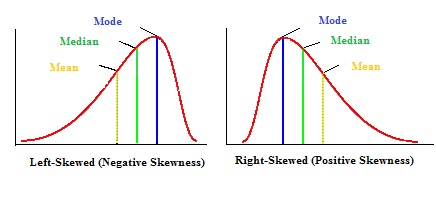

Inferences :
Slag and ash, age has wide difference in mean and 50% values,indicating mean > median, so being a right tailed skewness in data.

Also, slag and ash, superplastic has min value as 0, which cannot be in the composition of cement.

in cement., min = 102, std = 104, range is 102 - 540, does the nearing value of std and min indicate something?

In col Water , std is < min value, shuld we consider this variable for further analysis

considering the difference b/w ( Q1,median ) and (Q3 and median) in columns slag,ash there are huge number of outliers.

Other columns has very little diff b/w ( Q1,median ) and (Q3 and median), so there might be 1 or 2 outliers

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055

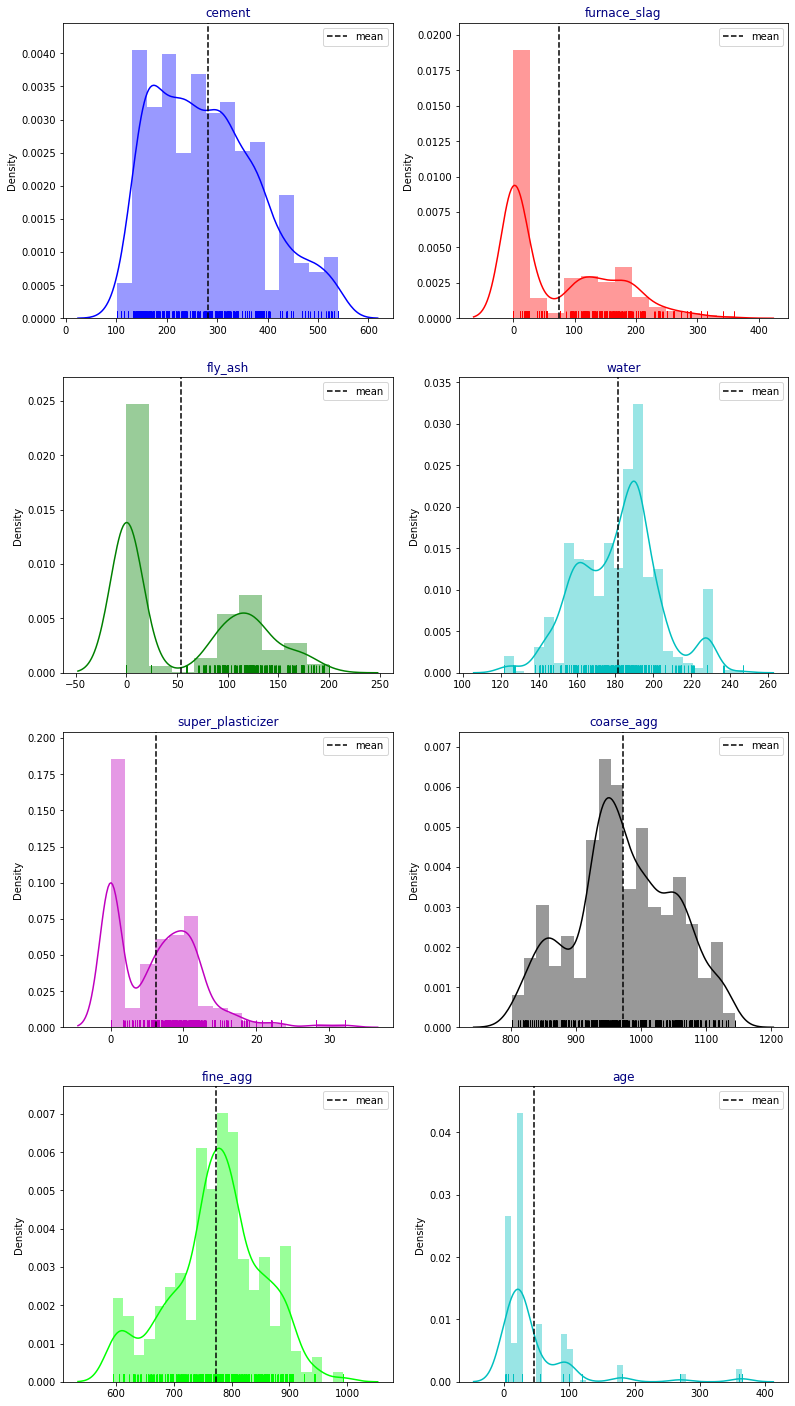

In [ ]:
import itertools
cols = [i for i in data.columns if i not in 'compressive_strength']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","c"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(data[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(data[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

The data does not contain any missing values or special symbols, but it has 0 value in few columns, which has to be treated.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


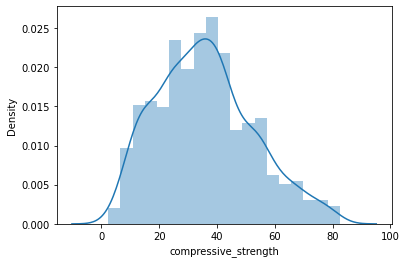

In [ ]:
sns.distplot(data['compressive_strength'])

In [ ]:
# The target variable has the distribution of data to be almost normal, but with lesser values on higher range, / higher values on lesser range
# Let us check the skewness:
print("Skewness = ",data['compressive_strength'].skew())

Skewness =  0.416977288410718


It is positively, lightly skewed, as the skew value is < 0.5. For analysis, we can log transform this variable for better analysis, optional.

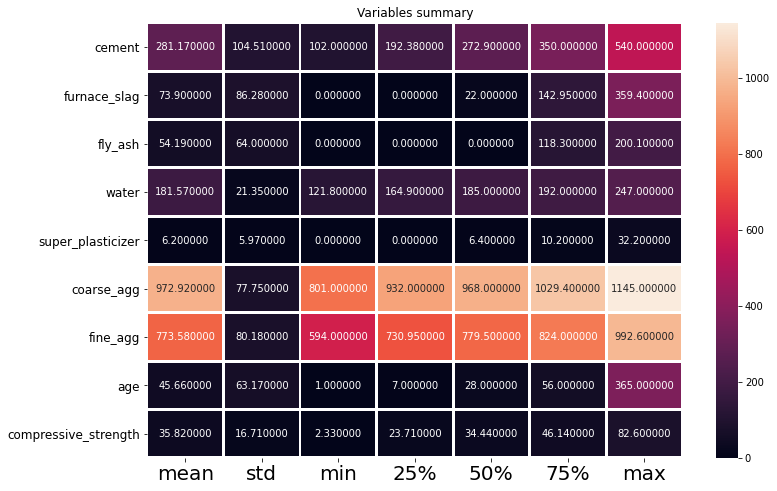

In [ ]:
#corr = data.corr() 
#sns.heatmap(corr, annot=True, cmap='Blues')
plt.figure(figsize=(12,8))
sns.heatmap(round(data.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

In [ ]:
def label(data):
    if data["age"] <= 30:
        return "1 month"
    if data["age"] > 30 and data["age"] <= 60 :
        return "2 months"
    if data["age"] > 60 and data["age"] <= 90 :
        return "3 months"
    if data["age"] > 90 and data["age"] <= 120 :
        return "4 months"
    if data["age"] > 120 and data["age"] <= 150 :
        return "5 months"
    if data["age"] > 150 and data["age"] <= 180 :
        return "6 months"
    if data["age"] > 180 and data["age"] <= 210 :
        return "7 months"
    if data["age"] > 210 and data["age"] <= 240 :
        return "8 months"
    if data["age"] > 240 and data["age"] <= 270 :
        return "9 months"
    if data["age"] > 270 and data["age"] <= 300 :
        return "10 months"
    if data["age"] > 300 and data["age"] <= 330 :
        return "11 months"
    if data["age"] > 330 :
        return "12 months"
data["age_months"] = data.apply(lambda data:label(data) , axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1605: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  color=self.colors, align="center", **kws)


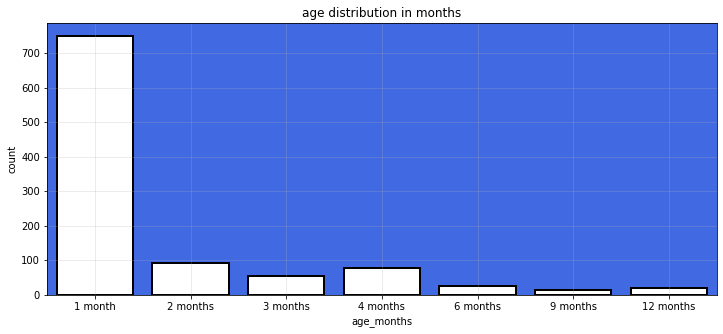

In [ ]:
plt.figure(figsize=(12,5))
order = ['1 month','2 months', '3 months','4 months','6 months','9 months', '12 months']
ax = sns.countplot(data["age_months"],
                   order=order,linewidth=2,
                   edgecolor = "k"*len(order),
                   palette=["w"])
ax.set_facecolor("royalblue")
plt.title("age distribution in months")
plt.grid(True,alpha=.3)
plt.show()

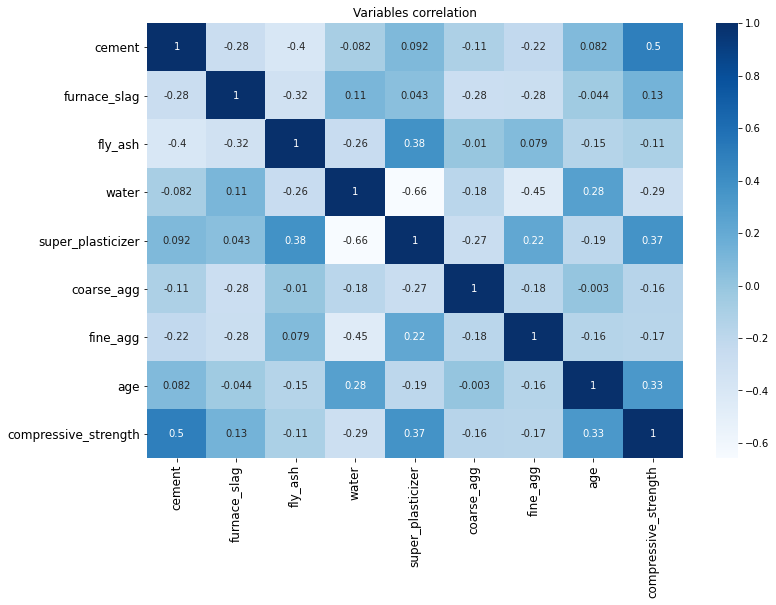

In [ ]:
plt.figure(figsize=(12,8))
corr = data.corr() 
sns.heatmap(corr, annot=True, cmap='Blues')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Variables correlation")
plt.show()

We can observe a high positive correlation between compressive Strength (CC_Strength) and Cement. this is true because strength concrete indeed increases with an increase in the amount of cement used in preparing it. Also, Age and Super Plasticizer are the other two factors influencing Compressive strength.

It is evident that cement and age, superplastic have good positive corr with strength, cement being the strong predictor Water has a good negative correlation with Strength, where are there are other variables with very less correlation there are good correlation amng variables : cement -> Slag = -ve relation and strength-> +ve Slag -> ash and fineaggg = -ve Water -> superplastic , fineagg strength = -ve superplastic -> ash and Strength positive correlation between water and slag age -> Strength and water

There are other strong correlations between the features,

A strong negative correlation between Super Plasticizer and Water.

positive correlations between Super Plasticizer and Fly Ash, Fine Aggregate.

These correlations are useful to understand the data in detail, as they give an idea about how a variable is affecting the other. We can further use a pairplot in seaborn to plot pairwise relations between all the features and distributions of features along the diagonal.

<Figure size 720x432 with 0 Axes>

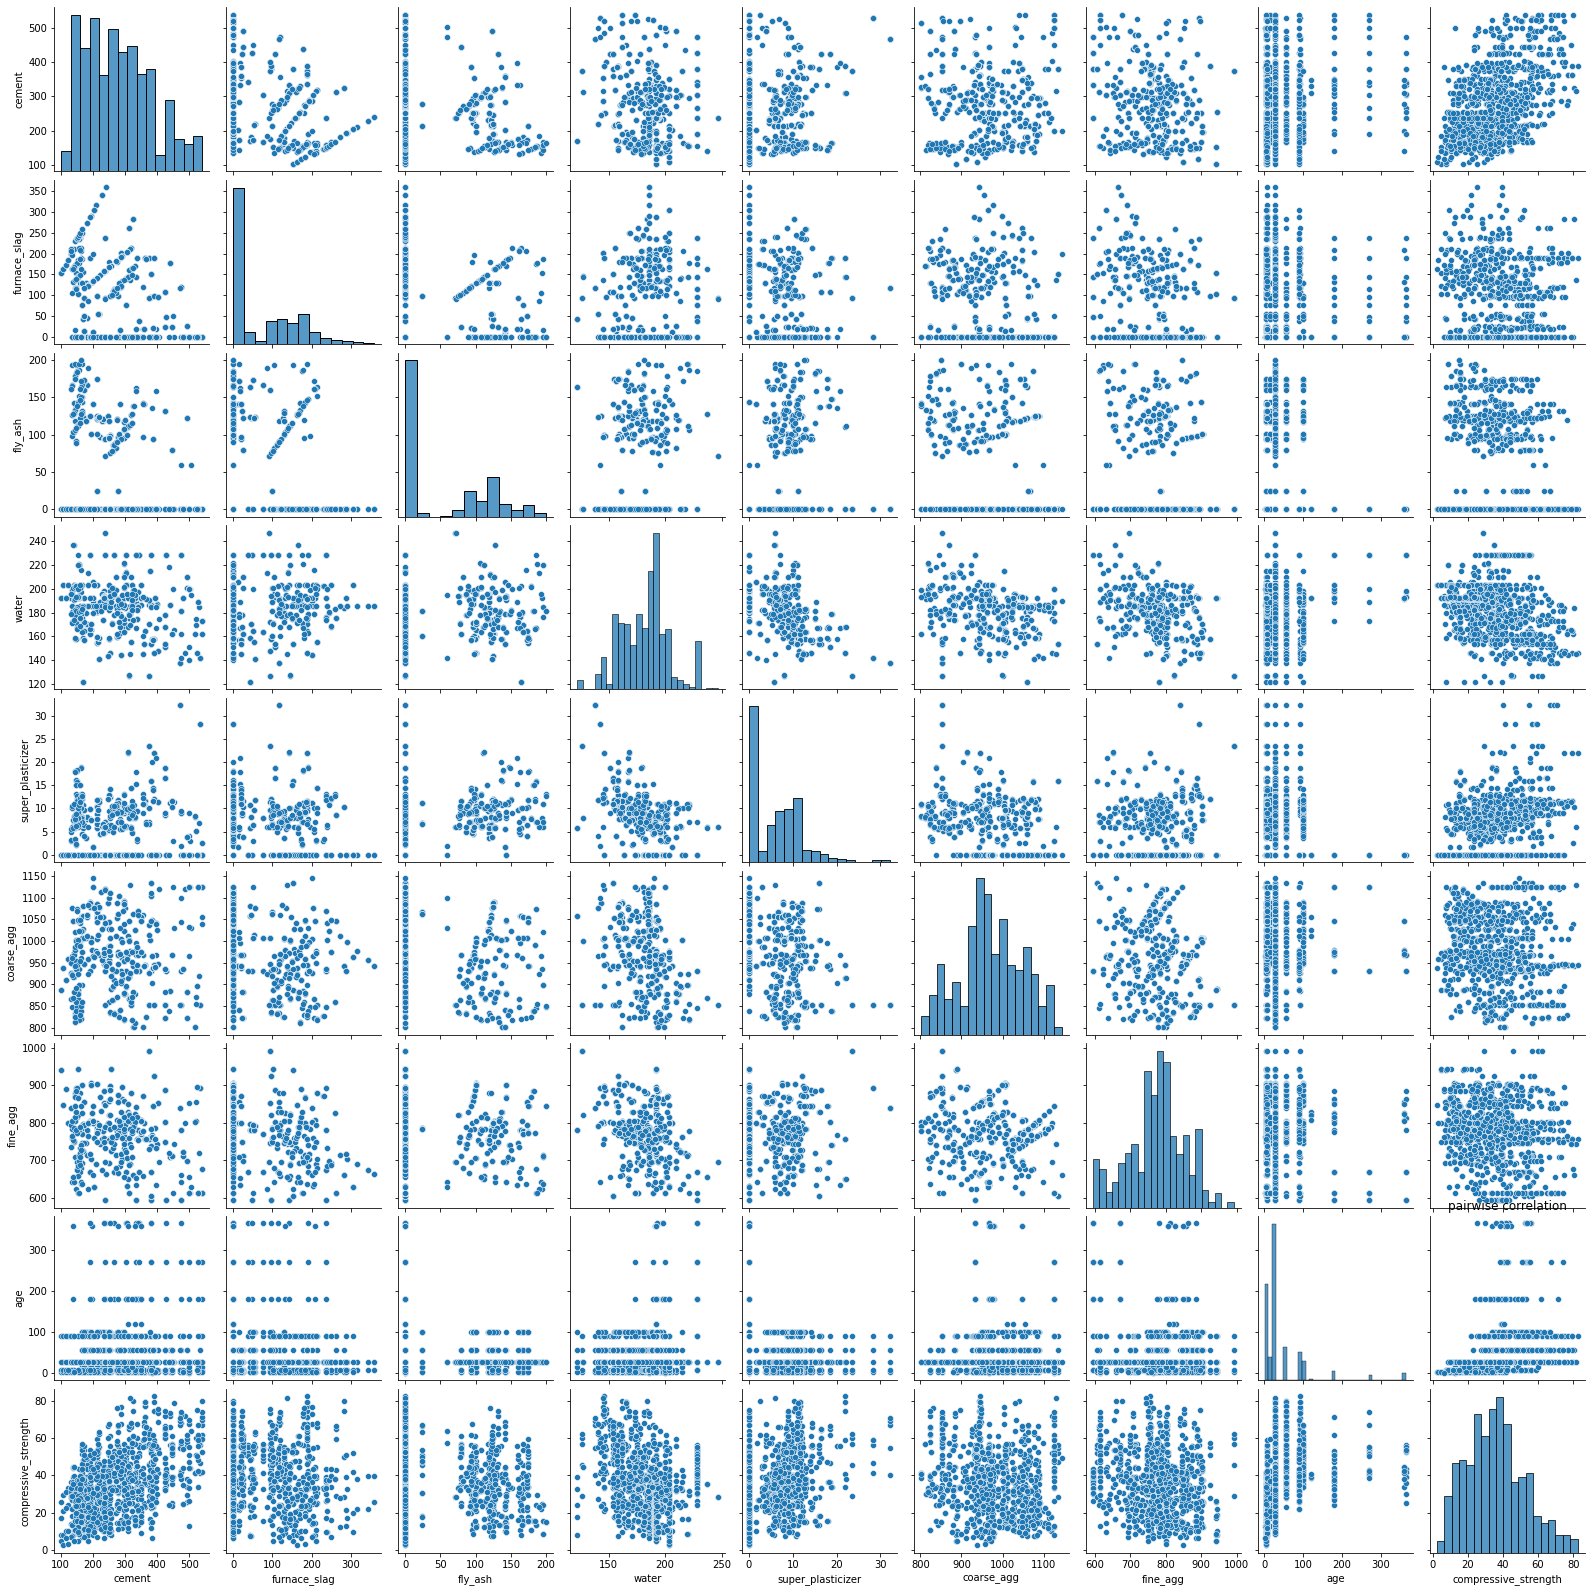

In [ ]:
sns.pairplot(data)

The pair plot gives a visual representation of correlations between all the features.

We can plot scatter plots between CC_Strength and other features to see more complex relations.

CC_Strength vs (Cement, Age, Water)

In [ ]:
data.columns

Index(['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer',
       'coarse_agg', 'fine_agg', 'age', 'compressive_strength'],
      dtype='object')

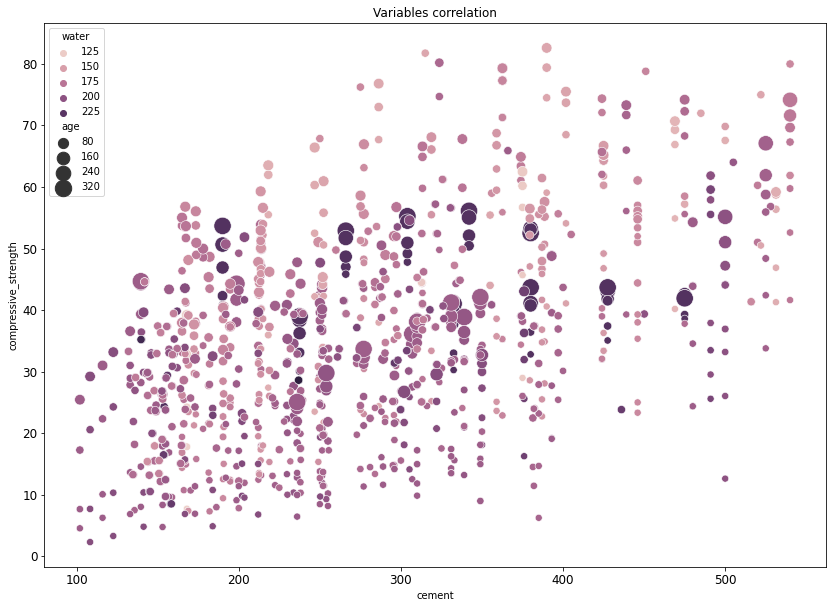

In [ ]:
plt.figure(figsize=(14,10))
corr = data.corr() 
sns.scatterplot(y="compressive_strength", x="cement", hue="water",size="age", data=data, sizes=(50, 300))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Variables correlation")
plt.show()

The observations we can make from this plot,

Compressive strength increases as the amount of cement increases, as the dots 
move up when we move towards right on the x-axis.

Compressive strength increases with age (as the size of dots represents the age), this not the case always but can be up to an extent.

Cement with less age requires more cement for higher strength, as the smaller dots are moving up when we move towards right on the x-axis.

The older the cement is the more water it requires, can be confirmed by observing the colour of the dots. Larger dots with dark colour indicate high age and more water.

Concrete strength increases when less water is used in preparing it since the dots on the lower side (y-axis) are darker and the dots on higher-end (y-axis) are brighter.

CC Strength vs (Fine aggregate, Super Plasticizer, Fly Ash)

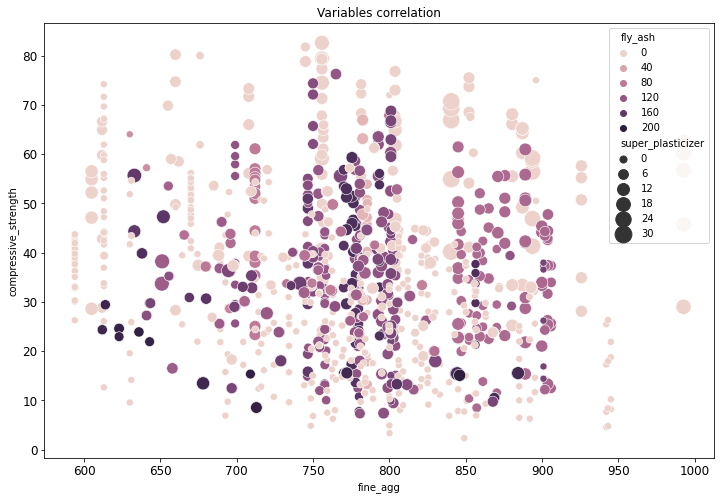

In [ ]:
plt.figure(figsize=(12,8))
corr = data.corr() 
sns.scatterplot(y="compressive_strength", x="fine_agg", hue="fly_ash",size="super_plasticizer", data=data, sizes=(50, 300))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Variables correlation")
plt.show()

Observations,

Compressive strength decreases Fly ash increases, as darker dots are concentrated in the region representing low compressive strength.

Compressive strength increases with Superplasticizer since larger the dot the higher they are in the plot.

We can visually understand 2D, 3D and max up to 4D plots (features represented by colour and size) as shown above, we can further use row-wise and column-wise plotting features by seaborn to do further analysis, but still, we lack the ability to track all these correlations by ourselves. For this reason, we can turn to Machine Learning to capture these relations and give better insights into the problem.

###Data Preprocessing

Before we fit machine learning models on the data, we need to split the data into train, test splits. The features can be rescaled to have a mean of zero and a standard deviation of 1 i.e. all the features fall into the same range.

In [ ]:
#Splitting train and test data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = data.iloc[:,:-1] # Features 
y = data.iloc[:,-1] # Target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2) 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

Model Building
After preparing the data, we can fit different models on the training data and compare their performance to choose the algorithm with good performance. As this is a regression problem, we can use RMSE (Root Mean Square Error) and $R²$ score as evaluation metrics.

1. Linear Regression
We will start with Linear Regression since this is the go-to algorithm for any regression problem. The algorithm tries to form a linear relationship between the input features and the target variable i.e. it fits a straight line given by,

Image for post
Linear Regression
Where w_i corresponds to the coefficient of feature x_i.

The magnitude of these coefficients can be further controlled by using regularization terms to the cost functions. Adding the sum of the magnitudes of the coefficients will result in the coefficients being close to zero, this variation of linear regression is called Lasso Regression. Adding the sum of squares of the coefficients to the cost function will make the coefficients be in the same range and this variation is called Ridge Regression. Both these variations help in reducing the model complexity and therefore reducing the chances of overfitting on the data.

In [ ]:
# Importing models 
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
import numpy as np
# Linear Regression 
lr = LinearRegression() 
# Lasso Regression 
lasso = Lasso() 
# Ridge Regression 
ridge = Ridge() 
# Fitting models on Training data 
lr.fit(X_train, y_train) 
lasso.fit(X_train, y_train) 
ridge.fit(X_train, y_train) 
# Making predictions on Test data 
y_pred_lr = lr.predict(X_test) 
y_pred_lasso = lasso.predict(X_test) 
y_pred_ridge = ridge.predict(X_test) 

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
print("Model\t\t\t RMSE \t\t R2") 
print("""LinearRegression \t {:.2f} \t\t{:.2f}""".format(  np.sqrt(mean_squared_error(y_test, y_pred_lr)), r2_score(y_test, y_pred_lr))) 
print("""LassoRegression \t {:.2f} \t\t{:.2f}""".format( np.sqrt(mean_squared_error(y_test, y_pred_lasso)), r2_score(y_test, y_pred_lasso))) 
print("""RidgeRegression \t {:.2f} \t\t{:.2f}""".format( np.sqrt(mean_squared_error(y_test, y_pred_ridge)), r2_score(y_test, y_pred_ridge)))

Model			 RMSE 		 R2
LinearRegression 	 10.28 		0.57
LassoRegression 	 10.68 		0.54
RidgeRegression 	 10.29 		0.57


There is not much difference between the performance with these three algorithms, we can plot the coefficients assigned by the three algorithms for the features with the following code.

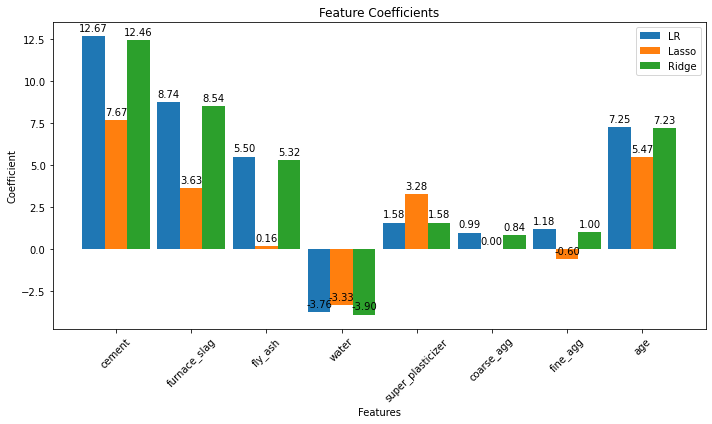

In [ ]:
coeff_lr = lr.coef_ 
coeff_lasso = lasso.coef_ 
coeff_ridge = ridge.coef_ 
labels = data.columns[:-1] 
x = np.arange(len(labels)) 
width = 0.3 
fig, ax = plt.subplots(figsize=(10,6)) 
rects1 = ax.bar(x - 2*(width/2), coeff_lr, width, label='LR') 
rects2 = ax.bar(x, coeff_lasso, width, label='Lasso') 
rects3 = ax.bar(x + 2*(width/2), coeff_ridge, width, label='Ridge') 
ax.set_ylabel('Coefficient') 
ax.set_xlabel('Features') 
ax.set_title('Feature Coefficients') 
ax.set_xticks(x) 
ax.set_xticklabels(labels, rotation=45) 
ax.legend() 
def autolabel(rects): 
   """Attach a text label above each bar in *rects*, displaying its height.""" 
   for rect in rects: 
      height = rect.get_height() 
      ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom') 
autolabel(rects1) 
autolabel(rects2) 
autolabel(rects3) 
fig.tight_layout() 
plt.show()

As seen in the figure, Lasso regression pushes the coefficients towards zero and the coefficients with the normal Linear Regression and Ridge Regression are almost the same.

We can further see how the predictions are by plotting the true values and predicted values,

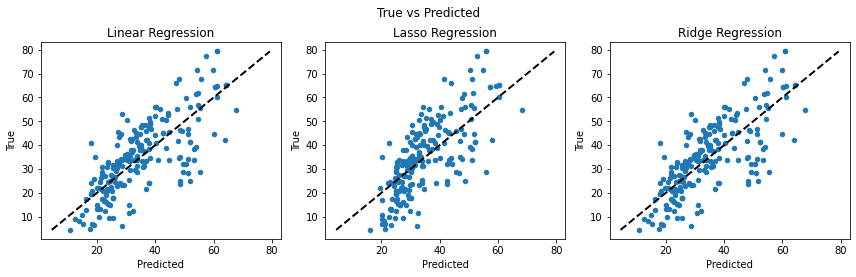

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4)) 
ax1.scatter(y_pred_lr, y_test, s=20) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax1.set_ylabel("True") 
ax1.set_xlabel("Predicted") 
ax1.set_title("Linear Regression") 
ax2.scatter(y_pred_lasso, y_test, s=20) 

ax2.plot([y_test.min(), y_test.max()], 
[y_test.min(), y_test.max()], 'k--', lw=2) 
ax2.set_ylabel("True") 
ax2.set_xlabel("Predicted") 
ax2.set_title("Lasso Regression") 
ax3.scatter(y_pred_ridge, y_test, s=20) 

ax3.plot([y_test.min(), y_test.max()], 
[y_test.min(), y_test.max()], 'k--', lw=2) 
ax3.set_ylabel("True") 
ax3.set_xlabel("Predicted") 
ax3.set_title("Ridge Regression") 
fig.suptitle("True vs Predicted") 
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

If the predicted values and the target values are equal, then the points on the scatter plot will lie on the straight line. As we can see here, none of the model predicts the Compressive Strength correctly.

###2. Decision Trees

A Decision Tree Algorithm represents the data with a tree-like structure, where each node represents a decision taken on a feature. This algorithm would give better performance in this case, since we have a lot of zeros in some of the input features as seen from their distributions in the pair plot above. This would help the decision trees build trees based on some conditions on features which can further improve performance.

Model				 RMSE 		 R2
Decision Tree Regressor 	 7.54 		0.77


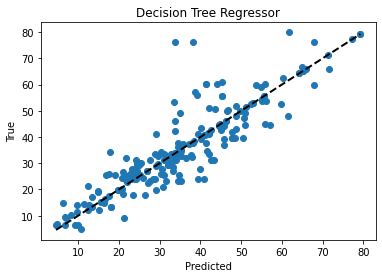

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor() 
dtr.fit(X_train, y_train) 
y_pred_dtr = dtr.predict(X_test) 
print("Model\t\t\t\t RMSE \t\t R2") 
print("""Decision Tree Regressor \t {:.2f} \t\t{:.2f}""".format( np.sqrt(mean_squared_error(y_test, y_pred_dtr)), r2_score(y_test, y_pred_dtr))) 
plt.scatter(y_test, y_pred_dtr) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Decision Tree Regressor") 
plt.show()

The Root Mean Squared Error (RMSE) has come down from 10.29 to 7.31, so the Decision Tree Regressor has improved the performance by a significant amount. This can be observed in the plot as well as more points are closer to the line.

###3. Random Forests

Using a Decision Tree Regressor has improved our performance, we can further improve the performance by ensembling more trees. Random Forest Regressor trains randomly initialized trees with random subsets of data sampled from the training data, this will make our model more robust.

Model				 RMSE 		 R2
Random Forest Regressor 
	 5.20 		0.89


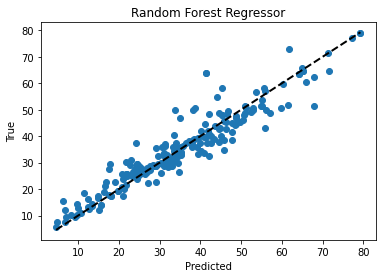

In [ ]:
from sklearn.ensemble import RandomForestRegressor 
rfr = RandomForestRegressor(n_estimators=100) 
rfr.fit(X_train, y_train) 

y_pred_rfr = rfr.predict(X_test) 

print("Model\t\t\t\t RMSE \t\t R2") 
print("""Random Forest Regressor 
\t {:.2f} \t\t{:.2f}""".format( np.sqrt(mean_squared_error(y_test, 
y_pred_rfr)), r2_score(y_test, y_pred_rfr))) 

plt.scatter(y_test, y_pred_rfr) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Random Forest Regressor") 
plt.show()

The RMSE has further reduced by ensembling multiple trees. We can plot the feature importance’s for tree-based models. The feature importance’s show how important a feature is for a model when making a prediction.

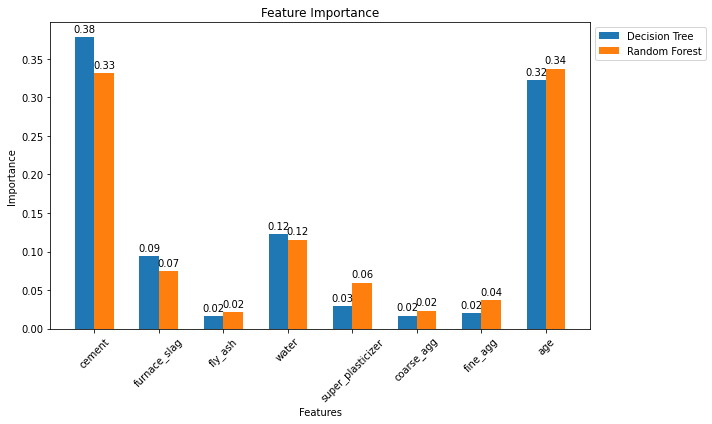

In [ ]:
feature_dtr = dtr.feature_importances_ 
feature_rfr = rfr.feature_importances_ 
labels = data.columns[:-1] 
x = np.arange(len(labels)) 
width = 0.3 
fig, ax = plt.subplots(figsize=(10,6)) 
rects1 = ax.bar(x-(width/2), feature_dtr, width, label='Decision Tree') 
rects2 = ax.bar(x+(width/2), feature_rfr, width, label='Random Forest') 
ax.set_ylabel('Importance') 
ax.set_xlabel('Features') 
ax.set_title('Feature Importance') 
ax.set_xticks(x) 
ax.set_xticklabels(labels, rotation=45) 
ax.legend(loc="upper left", bbox_to_anchor=(1,1)) 
autolabel(rects1) 
autolabel(rects2) 
fig.tight_layout() 
plt.show()


Cement and Age are treated as the most important features by tree-based models. Fly ash, Coarse and Fine aggregates are the least important factors when predicting the Strength of Concrete.

###4. XGBoost 

[13:33:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model				 RMSE 		 R2
XGB Regressor 
	 5.47 		0.88


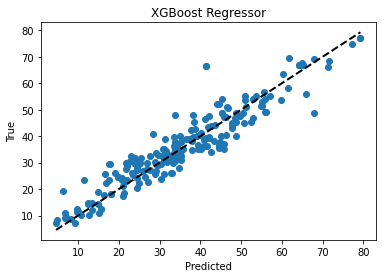

In [ ]:
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor(n_estimators=100) 
xgb.fit(X_train, y_train) 

y_pred_xgb = xgb.predict(X_test) 

print("Model\t\t\t\t RMSE \t\t R2") 
print("""XGB Regressor 
\t {:.2f} \t\t{:.2f}""".format( np.sqrt(mean_squared_error(y_test, 
y_pred_xgb)), r2_score(y_test, y_pred_rfr))) 

plt.scatter(y_test, y_pred_rfr) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("XGBoost Regressor") 
plt.show()

###Comparison

Finally, let us compare the results of all the algorithms.

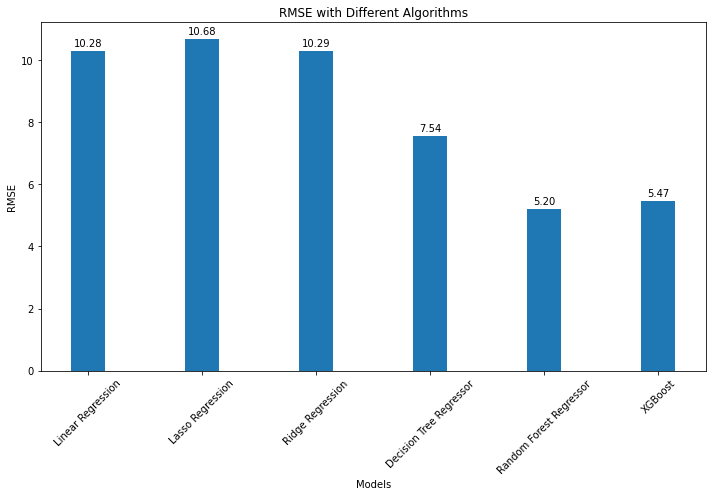

In [ ]:
models = [lr, lasso, ridge, dtr, rfr, xgb] 
names = ["Linear Regression", "Lasso Regression", "Ridge Regression", "Decision Tree Regressor", "Random Forest Regressor", "XGBoost"] 
rmses = [] 
for model in models: 
   rmses.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test)))) 
x = np.arange(len(names)) 
width = 0.3 
fig, ax = plt.subplots(figsize=(10,7)) 
rects = ax.bar(x, rmses, width) 
ax.set_ylabel('RMSE') 
ax.set_xlabel('Models') 
ax.set_title('RMSE with Different Algorithms') 
ax.set_xticks(x) 
ax.set_xticklabels(names, rotation=45) 
autolabel(rects) 
fig.tight_layout() 
plt.show()